In [17]:
%matplotlib notebook
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

print(tf.VERSION)
print(tf.keras.__version__)

1.10.0
2.1.6-tf


In [164]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [98]:
# Load data
digits = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = digits.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0


In [99]:
X_train[0].shape

(28, 28)

In [113]:
image_shape = X_train[0].shape
image_size_flatten = X_train[0].reshape(-1).shape[0]
print("image shape = ",image_shape)
print("flatten image size = ",image_size_flatten)
print("image width/height = ",image_shape[0])

image shape =  (28, 28)
flatten image size =  784
image width/height =  28


In [101]:
X_train[:8].shape

(8, 28, 28)

<IPython.core.display.Javascript object>


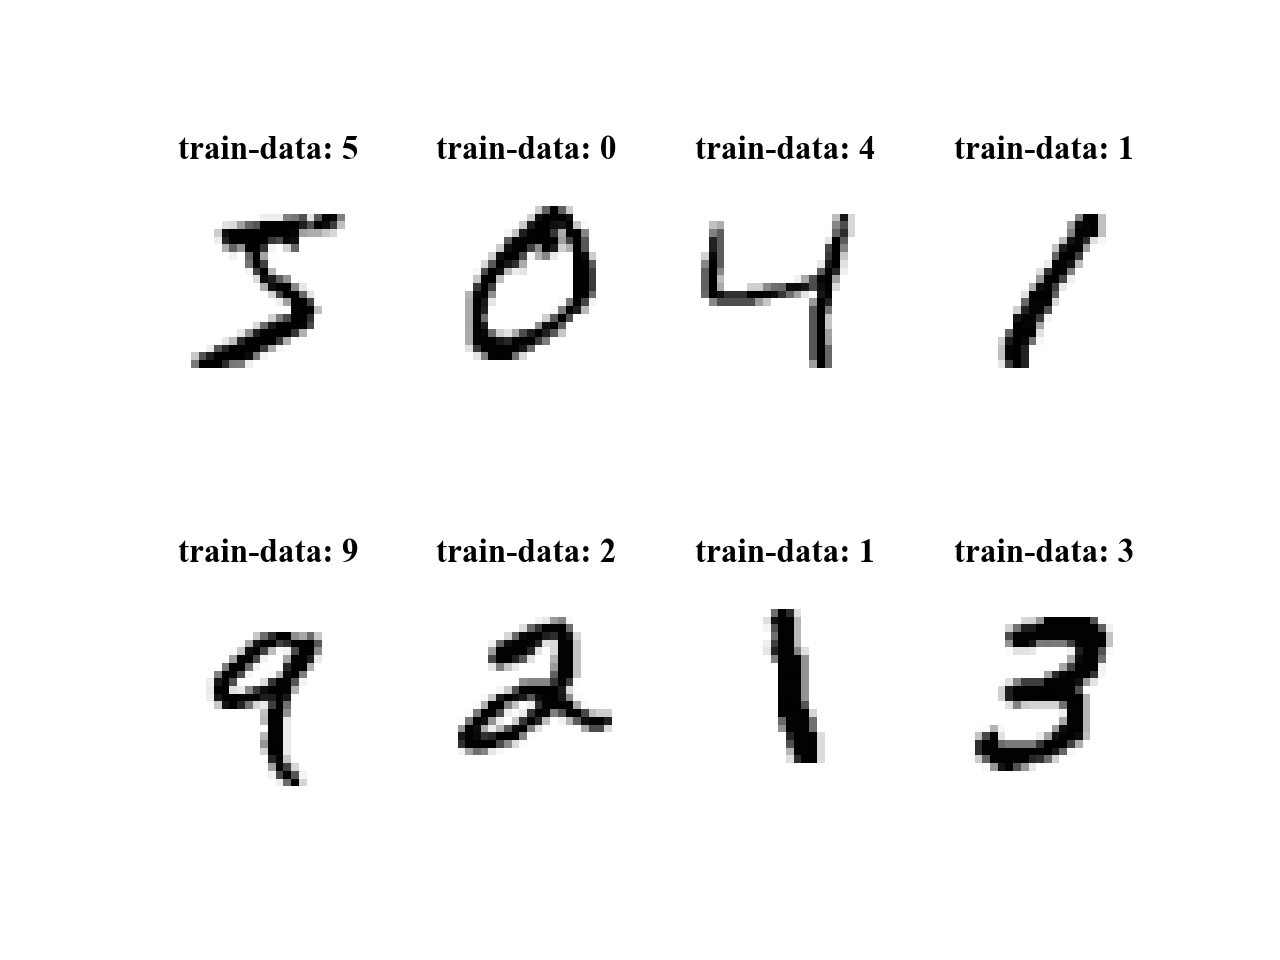

In [102]:
images_and_labels = list(zip(X_train[:8], y_train[:8]))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('train-data: {}'.format(label),size=12)

http://cs231n.github.io/convolutional-networks/

Summary. To summarize, the Conv Layer:

* Accepts a volume of size W1×H1×D1

* Requires four hyperparameters:
    * Number of filters K,
    * their spatial extent F,
    * the stride S,
    * the amount of zero padding P.
    
* Produces a volume of size W2×H2×D2 where:
    * W2=(W1−F+2P)/S+1
    * H2=(H1−F+2P)/S+1 (i.e. width and height are computed equally by symmetry)
    * D2=K
    
* With parameter sharing, it introduces F⋅F⋅D1 weights per filter, for a total of (F⋅F⋅D1)⋅K weights and K biases.
In the output volume, the d-th depth slice (of size W2×H2) is the result of performing a valid convolution of the d-th filter over the input volume with a stride of S, and then offset by d-th bias.


In [150]:
firstmodel=models.Sequential()

# # Reshape image from 1D-28x28 array to 2D-(28x28x1) array for CNN network
# firstmodel.add(layers.Reshape((image_shape[0],image_shape[1],1),
#                               input_shape=(image_size_flatten,),name='init_reshape'))

# First CNN layer with relu activation function. 
# Input dimensions
# w1 = h1 = 28 , D1 = 1 , k = 16 , S =1, P=1, F = 5
# weights = 5 x 5 matrix x D1 x filters
# bias = single values x filters
# w2 = h2 = ( w1 - F + 2P)/S + 1 = (28 - 5+2)/1+1 = 26
firstmodel.add(layers.Conv2D(kernel_size=5, strides=1, 
                        filters =16,padding='same',
                        activation='relu', 
                        input_shape=(image_shape[0],image_shape[1],1),
                        name='layer_conv1',
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros'))
firstmodel.add(layers.MaxPooling2D(pool_size=2, strides=2, name='P1'))

# Second convolutional layer with ReLU-activation and max-pooling.
firstmodel.add(layers.Conv2D(kernel_size=5, strides=1, 
                             filters=36, padding='same',
                 activation='relu', name='layer_conv2'))
firstmodel.add(layers.MaxPooling2D(pool_size=2, strides=2, name='P2'))
firstmodel.add(layers.Dropout(0.25,name='D1'))

# 
firstmodel.add(layers.Flatten())

firstmodel.add(layers.Dense(256, activation='relu'))
firstmodel.add(layers.Dropout(0.5))
firstmodel.add(layers.Dense(10, activation='softmax'))

firstmodel.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [151]:
firstmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
P1 (MaxPooling2D)            (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
P2 (MaxPooling2D)            (None, 7, 7, 36)          0         
_________________________________________________________________
D1 (Dropout)                 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               451840    
__________

In [153]:
X_train[:10].shape

(10, 28, 28)

In [157]:
X_train=X_train[:, :, :, np.newaxis]

In [158]:
X_train.shape

(60000, 28, 28, 1)

In [159]:
X_train[0].shape

(28, 28, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
.utils.to_categorical(Y, num_classes=10)

In [ ]:
firstmodel.fit(x=X_train,
               y=tf.keras.utils.to_categorical(y_train,num_classes=10),
               epochs=1, batch_size=128)

Epoch 1/1
17024/60000 [=======>......................] - ETA: 5:28 - loss: 0.0775 - acc: 0.9726

In [ ]:
# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=(img_size_flat,)))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape(img_shape_full))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# First fully-connected / dense layer with ReLU-activation.
model.add(Dense(128, activation='relu'))

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
